In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# **To import files from google drive**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# **Importing the Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing the dataset**

In [4]:
df = pd.DataFrame(pd.read_csv("/content/gdrive/My Drive/TSF GRIP/Prediction using supervised ML/student_scores - student_scores.csv"))

In [5]:
df.head() # Getting an idea how the data looks like

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualising the dataset(roughly!)

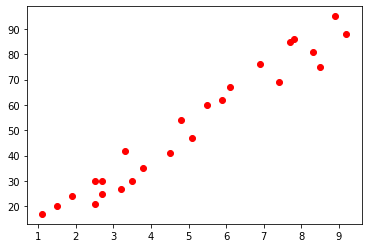

In [6]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1]
plt.scatter(X,Y,color = 'red')

As we can see from visualisation, we can first try to approximate the data using linear regression technique.

# **Splitting the data into train and test sets**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.08, random_state = 0)

# Training the Simple Linear Regression model on the training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # The input should be an array

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Predicting the trained model on the test set**

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
y_pred

array([17.40407272, 33.98364016])

In [11]:
pred = pd.DataFrame({'True value': y_test, 'Predicted value' : y_pred})

In [12]:
pred

,True value,Predicted value
5,20,17.404073
2,27,33.983640


# **Visualising the training set result**

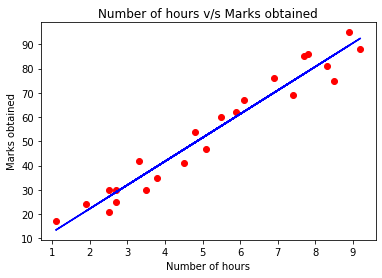

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Number of hours v/s Marks obtained")
plt.xlabel("Number of hours")
plt.ylabel("Marks obtained")
plt.show()

# **Evaluating the model**

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 


Mean Absolute Error: 4.789783720618381


# **Testing on example data**

In [15]:
hours = np.array([9.25]).reshape(1,-1)

In [16]:
eg_pred = regressor.predict(hours.reshape(1,-1))

In [17]:
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(eg_pred[0]))

No of Hours = [9.25]
Predicted Score = 92.98739487749276
